In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # pip install scipy
from scipy.stats import skew
%matplotlib inline 
## tekrardan show pilot demeye gerek kalmadan grafiklerin gözükmesi icin 
import plotly.express as px # görsellestirme icin kullaniyoruz

plt.rcParams["figure.figsize"] = (10, 6) ## boyutlari ayarlamak icin 

import warnings
warnings.filterwarnings("ignore")

In [51]:
co2 = pd.read_csv("co2.csv")
df= co2.copy()

In [3]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [6]:
df.describe(include="object").T  ## objectlerin degerlerine baktik, burada unique degerler 

count unique            top  freq
Make           7385     42           FORD   628
Model          7385   2053  F-150 FFV 4X4    32
Vehicle Class  7385     16    SUV - SMALL  1217
Transmission   7385     27            AS6  1324
Fuel Type      7385      5              X  3637

In [7]:
df.rename(columns={ 'Make': 'make',            ## sütunlari yeniden isimlendirdik.
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [52]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [9]:
missing_count = df.isnull().sum()  ## missing values var mi yok mu kontrol etmek icin kullandigimiz bir kod
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
make                    0         0.0
model                   0         0.0
vehicle_class           0         0.0
engine_size             0         0.0
cylinders               0         0.0
transmission            0         0.0
fuel_type               0         0.0
fuel_cons_city          0         0.0
fuel_cons_hwy           0         0.0
fuel_cons_comb          0         0.0
fuel_cons_comb_mpg      0         0.0
co2                     0         0.0

In [10]:
df.duplicated().sum() ## tekrar eden satirlari gösterdik

1103

### Make Sütunu

In [11]:
df.make.nunique()

42

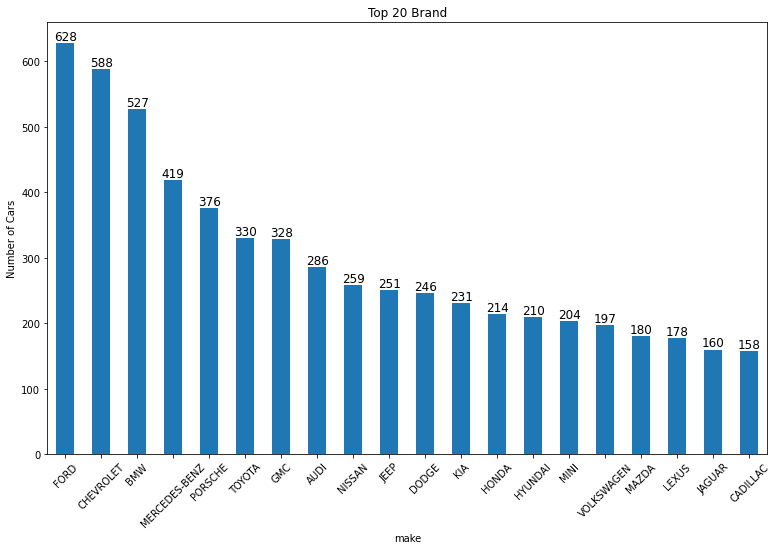

In [12]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')
plt.xlabel('make')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

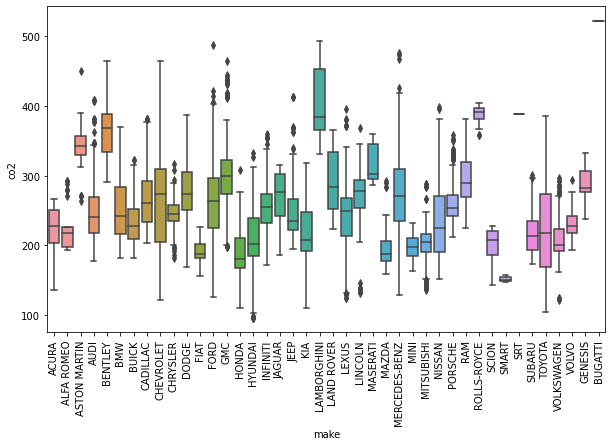

In [13]:
sns.boxplot(x="make",y="co2",data=df)
plt.xticks(rotation=90);
## yazilarin kac derece ile yazilmasini istiyorsak onu yazdik

## Model 

In [14]:
df.model.nunique()

2053

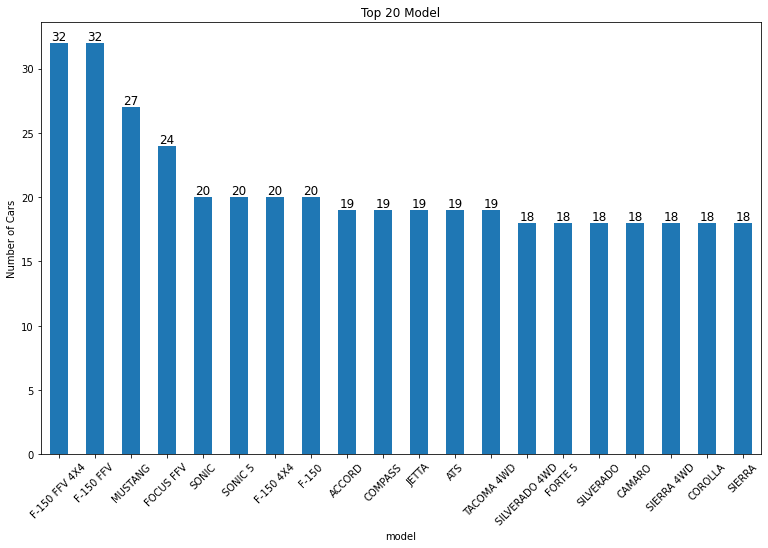

In [15]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')
plt.xlabel('model')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

### Vehicle Class 

In [16]:
df.vehicle_class.nunique()

16

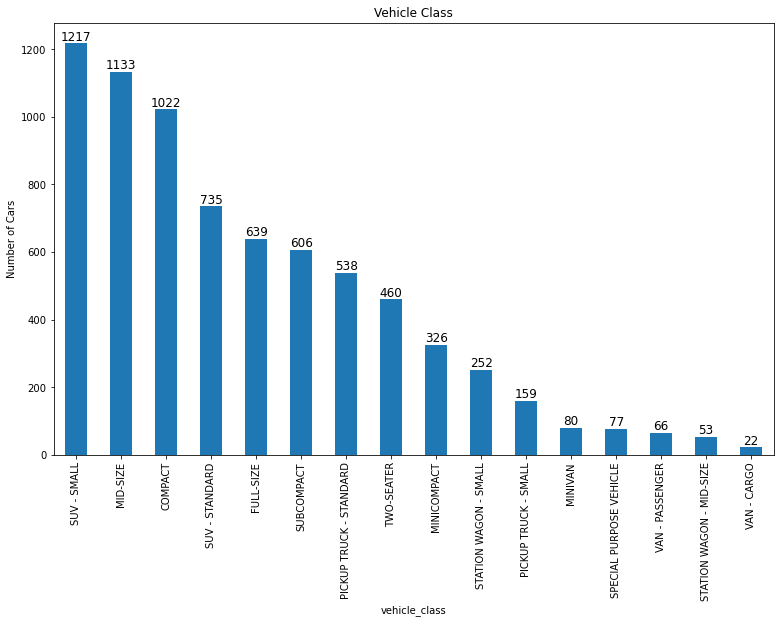

In [17]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.vehicle_class.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vehicle Class')
plt.xlabel('vehicle_class')
plt.ylabel('Number of Cars')
plt.xticks(rotation =90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [18]:
transmission_distr =df['vehicle_class'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='vehicle_class', names='index')
fig.update_layout(title="Vehicle Class Distribution")
fig.show()

### Engine Size 

In [19]:
df.engine_size.nunique()

51

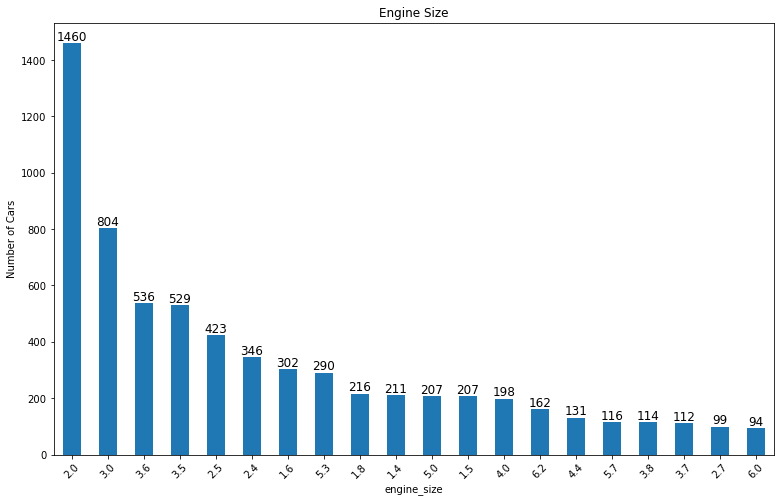

In [20]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.engine_size.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Engine Size')
plt.xlabel('engine_size')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

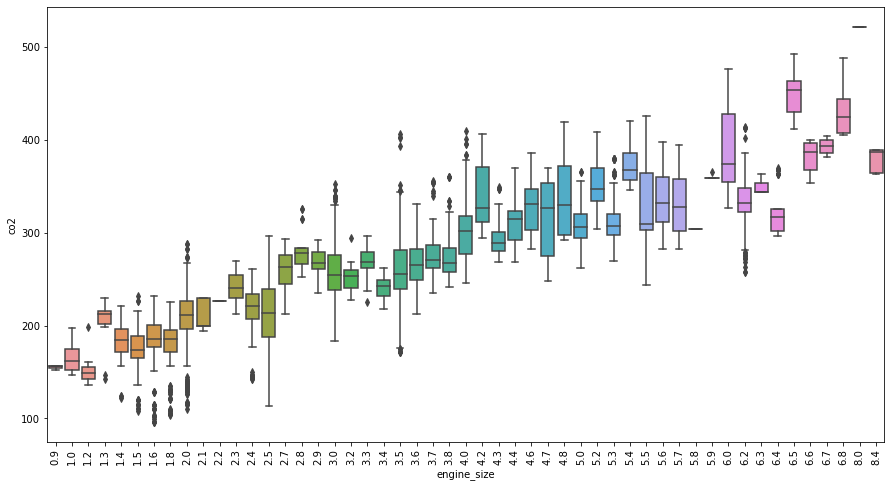

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x="engine_size", y="co2", data=df)
plt.xticks(rotation = 90);

### Cylinders

In [22]:
df.cylinders.value_counts().sort_values(ascending=False)

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: cylinders, dtype: int64

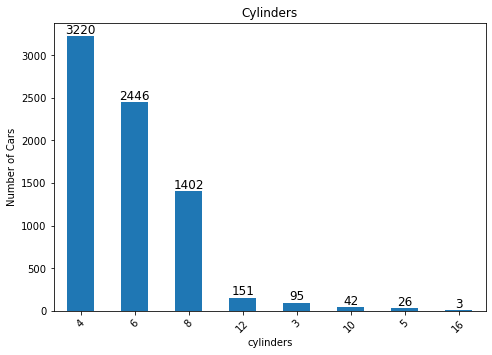

In [23]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Cylinders')
plt.xlabel('cylinders')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [24]:
df[df["cylinders"]==16] ## 16 silindiri olan araci bulduk

make   model vehicle_class  engine_size  cylinders transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   
6640  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
4509         Z            26.8           16.6            22.2   
5575         Z            26.8           16.6            22.2   
6640         Z            26.8           16.6            22.2   

      fuel_cons_comb_mpg  co2  
4509                  13  522  
5575                  13  522  
6640                  13  522

In [25]:
transmission_distr =df['cylinders'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='cylinders', names='index')
fig.update_layout(title="Cylinders Distribution")
fig.show()

sns.boxplot=(x="cylinders", y="co2",data=df)

###  Transmission

In [26]:
df.transmission.value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: transmission, dtype: int64

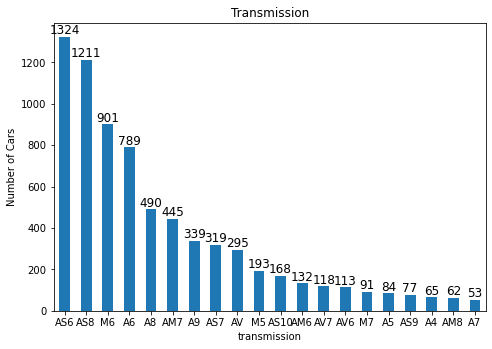

In [27]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')
plt.xlabel('transmission')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [28]:
transmission_distr =df['transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

### Fuel Type and Consumption

In [29]:
df.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

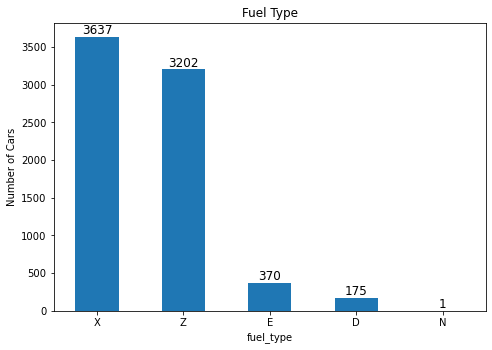

In [30]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel_type.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')
plt.xlabel('fuel_type')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);


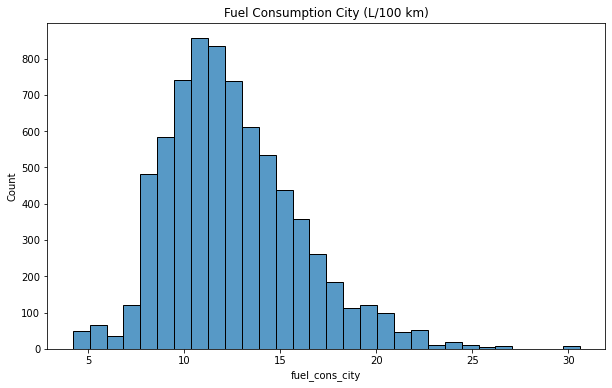

In [31]:
sns.histplot(data=df, x="fuel_cons_city", bins=30)  ## data nin normal dagilima uygun olup olmadigini inceliyoruz
plt.title('Fuel Consumption City (L/100 km)');

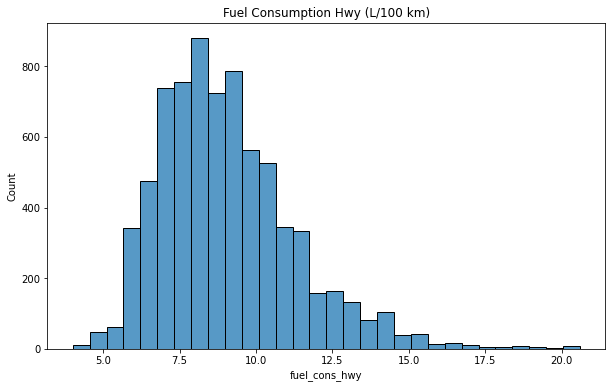

In [32]:
sns.histplot(data=df, x="fuel_cons_hwy", bins=30)
plt.title('Fuel Consumption Hwy (L/100 km)');

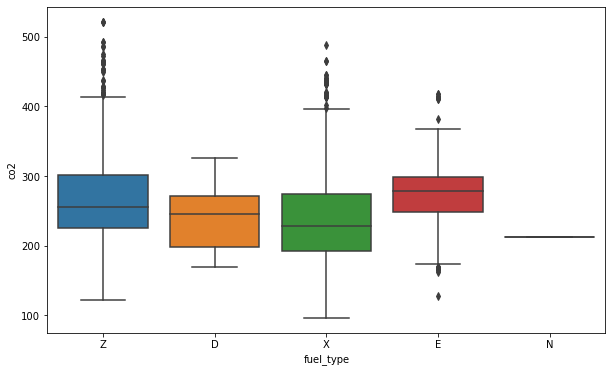

In [33]:
sns.boxplot(x="fuel_type", y="co2", data=df);

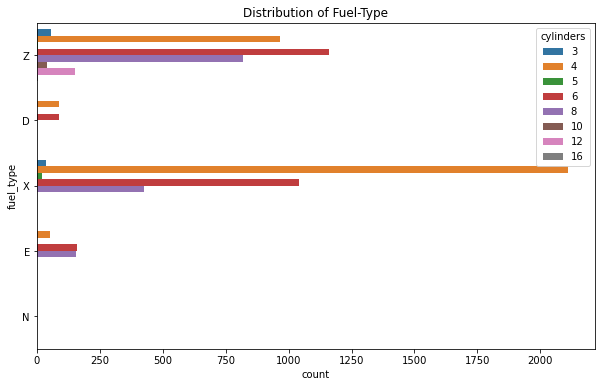

In [34]:
sns.countplot(y="fuel_type", data=df, hue='cylinders')
plt.title('Distribution of Fuel-Type');

### CO2 Emission

In [35]:
df[df.co2 == df.co2.min()]

make       model vehicle_class  engine_size  cylinders transmission  \
3824  HYUNDAI  IONIQ BLUE     FULL-SIZE          1.6          4          AM6   
4900  HYUNDAI  IONIQ BLUE     FULL-SIZE          1.6          4          AM6   
5931  HYUNDAI  IONIQ Blue     FULL-SIZE          1.6          4          AM6   
6950  HYUNDAI  IONIQ Blue     FULL-SIZE          1.6          4          AM6   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
3824         X             4.2            4.0             4.1   
4900         X             4.2            4.0             4.1   
5931         X             4.2            4.0             4.1   
6950         X             4.2            4.0             4.1   

      fuel_cons_comb_mpg  co2  
3824                  69   96  
4900                  69   96  
5931                  69   96  
6950                  69   96

In [36]:
df[df.co2 == df.co2.max()]

make   model vehicle_class  engine_size  cylinders transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   
6640  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
4509         Z            26.8           16.6            22.2   
5575         Z            26.8           16.6            22.2   
6640         Z            26.8           16.6            22.2   

      fuel_cons_comb_mpg  co2  
4509                  13  522  
5575                  13  522  
6640                  13  522

In [37]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color
df.corr().style.applymap(color_correlation1)

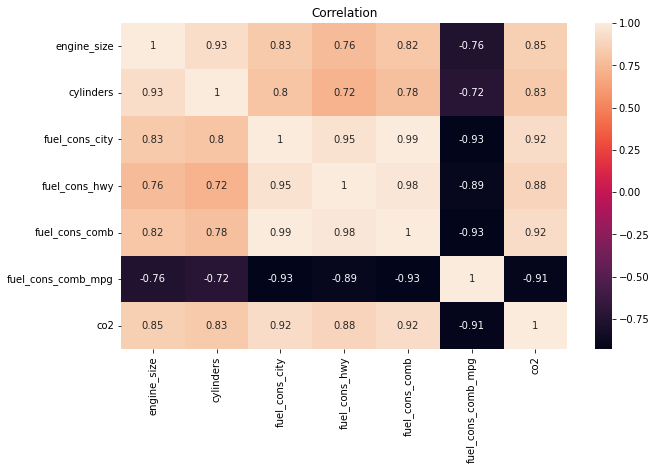

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation");

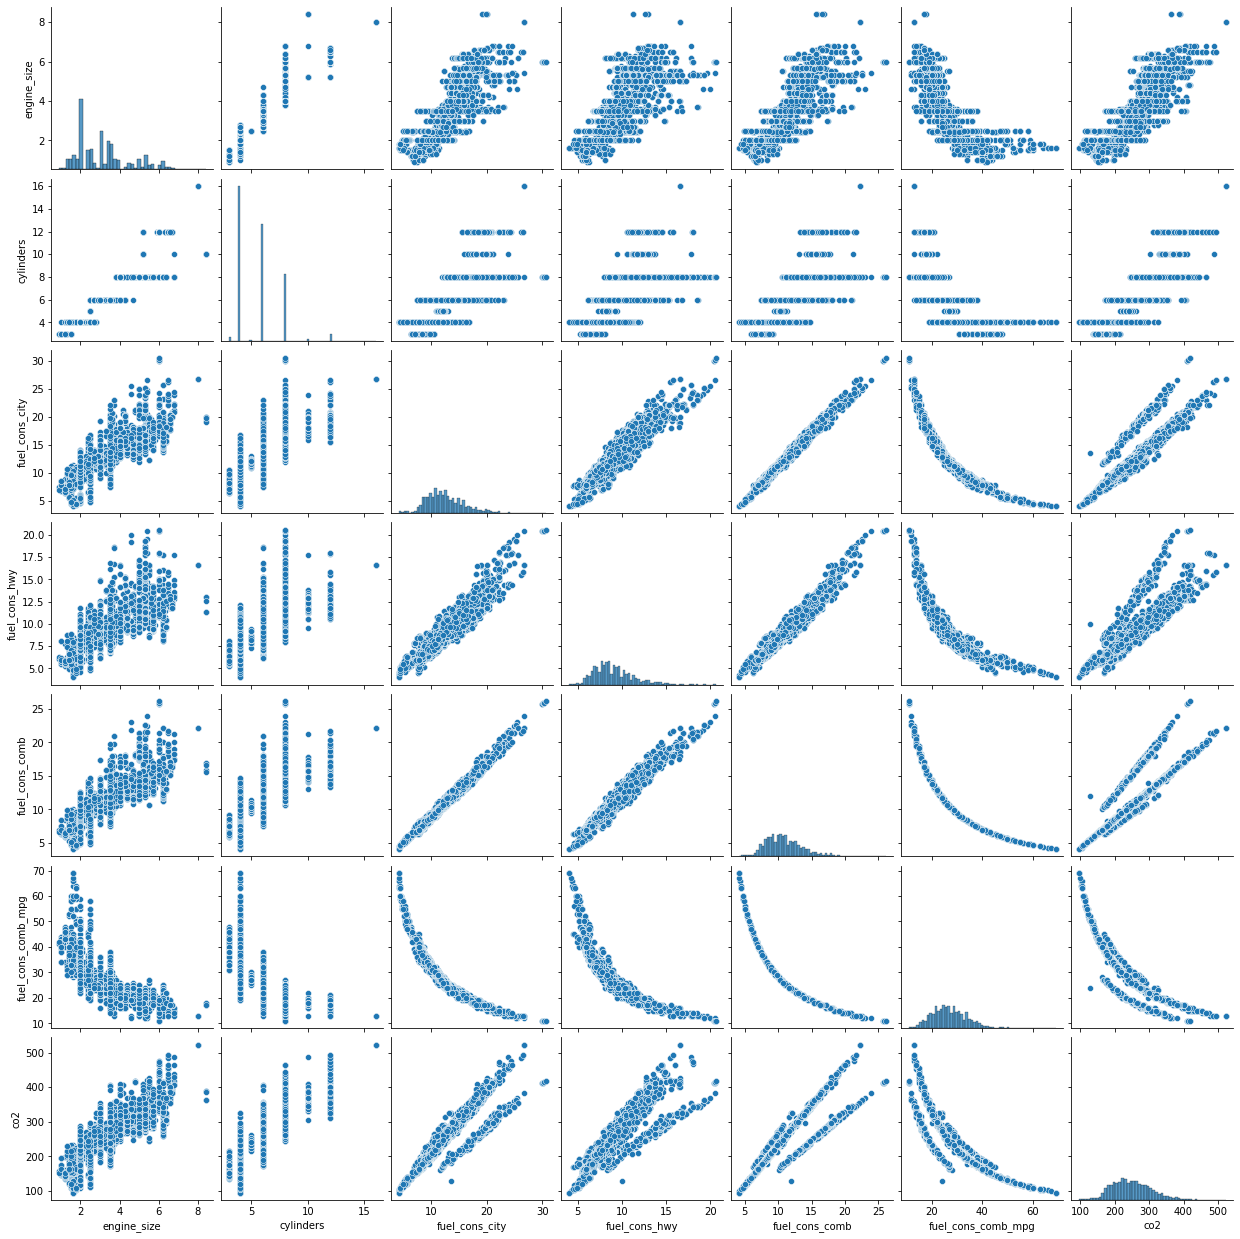

In [39]:
sns.pairplot(df);

## Simple Linear Regression Model

In [40]:
corr = df.co2.corr(df.engine_size)
corr

0.8511446437900009

In [41]:
r2_score = corr**2
r2_score

0.7244472046524075

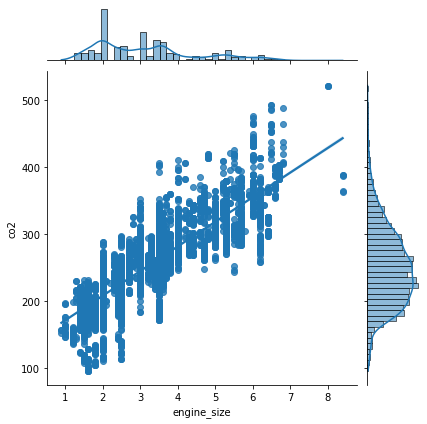

In [42]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg');

## Splitting the dataset into X (independent variables) and y (dependent variable)

In [43]:
X = df[['engine_size']]
y = df['co2']

### Train | Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) ## 7000 den fazla satir vardi bu yüzden 0.2 aldik

In [46]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 1)
Train target shape   :  (5908,)
Test features shape  :  (1477, 1)
Test target shape    :  (1477,)


In [47]:
X_train.head()

engine_size
1095          2.0
3538          5.3
2377          2.5
3414          4.4
880           3.4

### Training the Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
slr = LinearRegression()

In [50]:
slr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
slr.fit(X_train, y_train)

### Predicting Test Data¶

In [ ]:
y_train_pred = slr.predict(X_train)

In [ ]:
y_pred = slr.predict(X_test)

In [ ]:
sns.regplot(y_test, y_pred, ci=None)
plt.xlabel('y Test')
plt.ylabel('y Pred');

### Evaluating the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score

In [ ]:
avg_em= df['co2'].mean()  ## rmse ye göre yorum yaparken ortalama ya göre yorum yapmak gerekiyor
avg_em

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


In [ ]:
rmse/avg_em ## yüzdesel olarak hatayi bulduk


In [ ]:
sns.displot((y_test-y_pred), bins=50, kde=True);

### Prediction Error for LinearRegression

In [ ]:
from yellowbrick.regressor import PredictionError

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)

In [ ]:
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Multiple Lineer Regression

In [ ]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']]
y = df['co2']

In [ ]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color
df.corr().style.applymap(color_correlation2)

### Train | Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

### Training the Model

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(X_train, y_train)

In [ ]:
mlr.coef_

### Predicting Test Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
cdf.sample(10)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
df.describe().T

In [ ]:
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr(), annot = True); 

In [ ]:
from scipy.stats import skew

In [ ]:
df.corr()

In [ ]:
X = df.drop(columns="CO2 Emissions(g/km)")
y = df["CO2 Emissions(g/km)"]
print(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [ ]:
df.sample(15)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:

df

In [ ]:
df = df.drop(columns= 'Vehicle Class')

In [ ]:
df

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
model.coef_ 


In [ ]:
X_test.head()

In [ ]:
model.intercept_

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

In [ ]:
result_sample = comparing.head(25)
result_sample

In [ ]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [ ]:
from yellowbrick.regressor import PredictionError

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();  